### Exploratory Data Analysis

Import Libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Import Data

In [5]:
df = pd.read_csv(r"/content/train.csv")

In [6]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Missing Values Identification

In [7]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Descriptive Statistics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


Chart Visualization: Average Car Prices over the Years

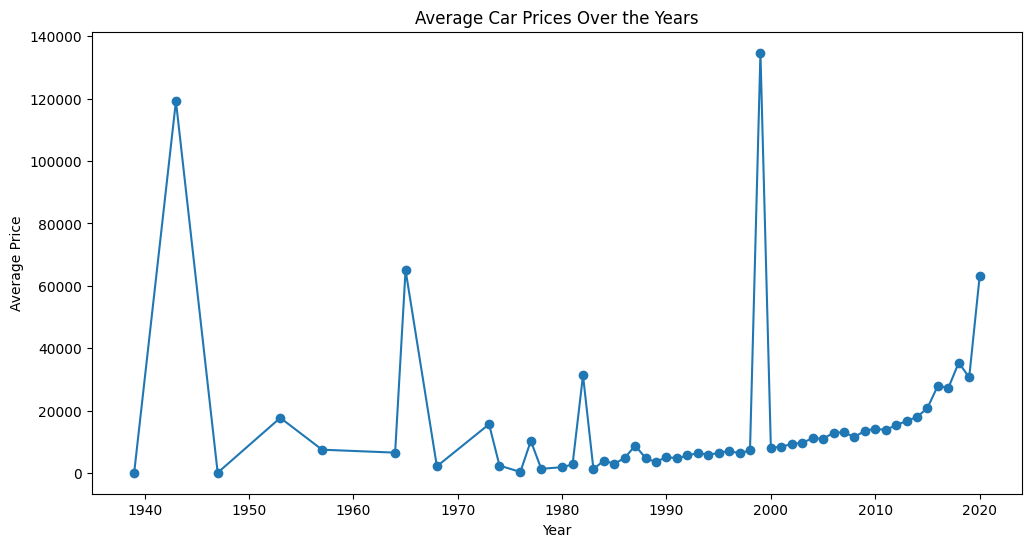

In [10]:
yearly_avg_prices = df.groupby('Prod. year')['Price'].mean()
plt.figure(figsize=(12, 6))
yearly_avg_prices.plot(marker='o')
plt.title('Average Car Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Chart Visualization: Manufacturer vs Car Prices

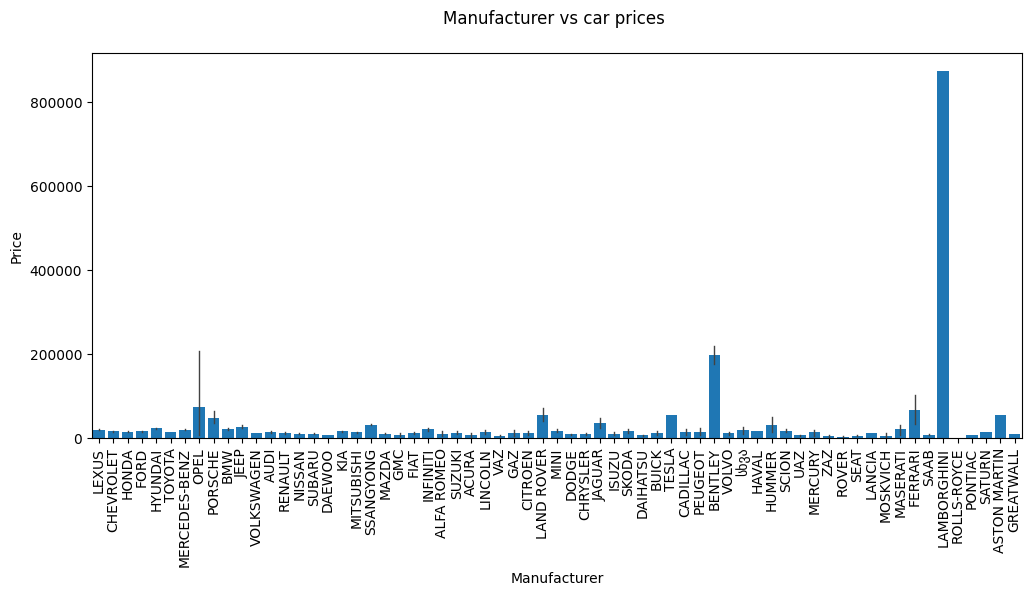

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(x= 'Manufacturer', y = 'Price', data = df, errwidth=1,saturation=1)
plt.title('Manufacturer vs car prices \n')
plt.xticks(rotation=90)
plt.show()

Chart Visualization: Fuel Type vs Car Prices

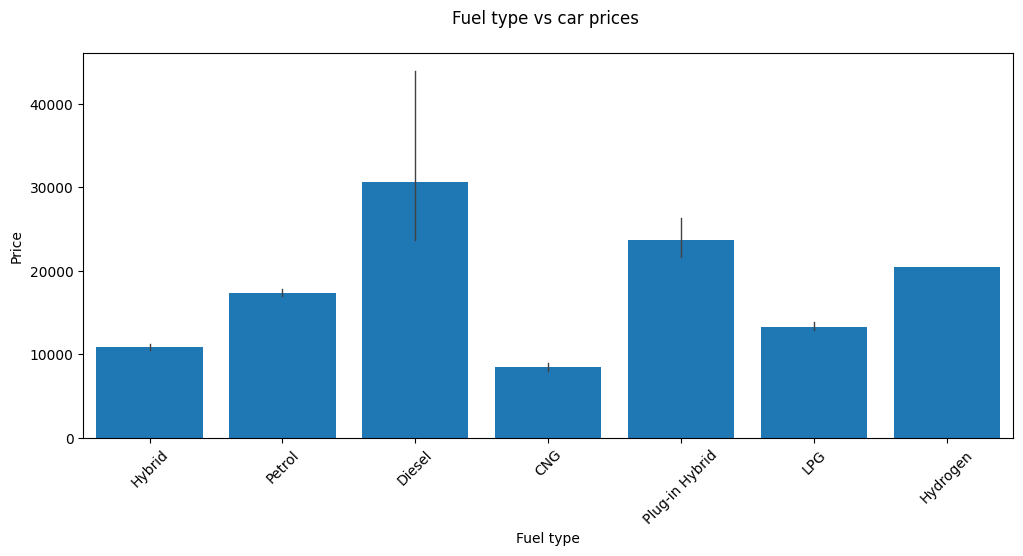

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(x='Fuel type', y = 'Price', data = df, errwidth=1,saturation=1)
plt.title('Fuel type vs car prices \n')
plt.xticks(rotation=45)
plt.show()

Chart Visualization: Category vs Car Prices

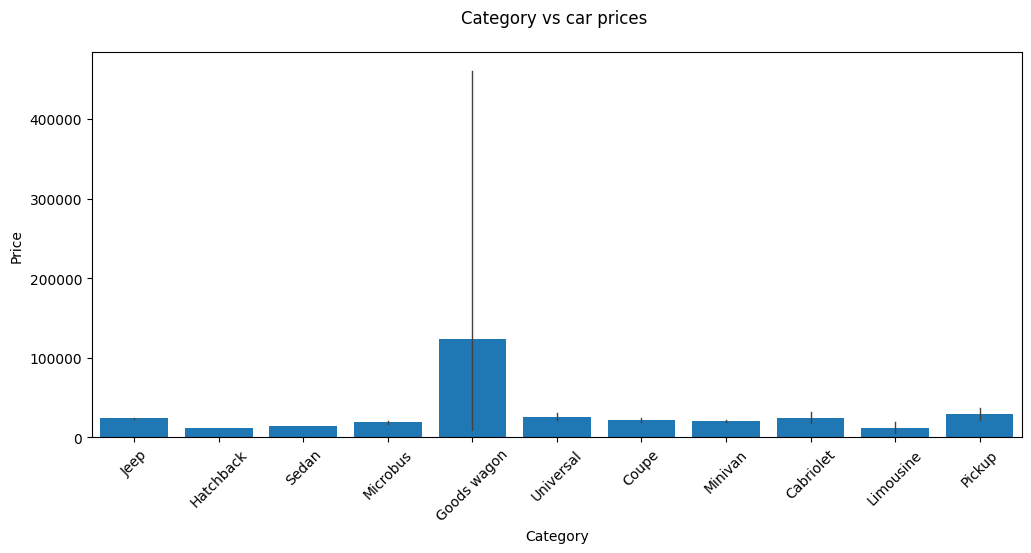

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(x='Category', y = 'Price', data = df, errwidth=1,saturation=1)
plt.title('Category vs car prices \n')
plt.xticks(rotation=45)
plt.show()

Feature Selection and Data Splitting

In [14]:
df['Price'] = pd.qcut(df['Price'], 2, labels=['Below 30K', 'Above 30K'])

In [15]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

Encoding the categorical features

In [35]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
encoder = LabelEncoder()
scaler = StandardScaler()

In [37]:
# Encoding the categorical features
categorical_features = X.select_dtypes(include=['object']).columns
for col in categorical_features:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.fit_transform(X_test[col])

X_train[categorical_features] = scaler.fit_transform(X_train[categorical_features])
X_test[categorical_features] = scaler.fit_transform(X_test[categorical_features])

### Machine Learning Algorithms

LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
log = LogisticRegression(solver='liblinear')
log.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [20]:
y_pred_log = log.predict(X_test)

In [22]:
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score of Logistic Regression is : {acc_log}")

Accuracy Score of Logistic Regression is : 0.4875259875259875


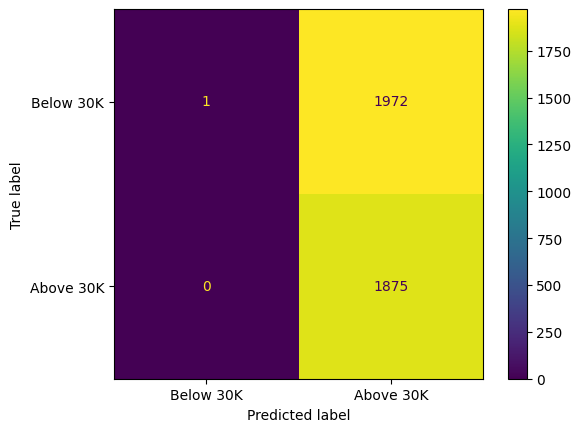

In [23]:
from sklearn import metrics
confusion_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_log, display_labels = ['Below 30K', 'Above 30K'])
cm_display.plot()
plt.show()

Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=9, max_features="log2")
# Train Decision Tree Classifer
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features='log2')

In [25]:
#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

In [26]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score of Decision Tree is : {acc_dt}")

Accuracy Score of Decision Tree is : 0.7211538461538461


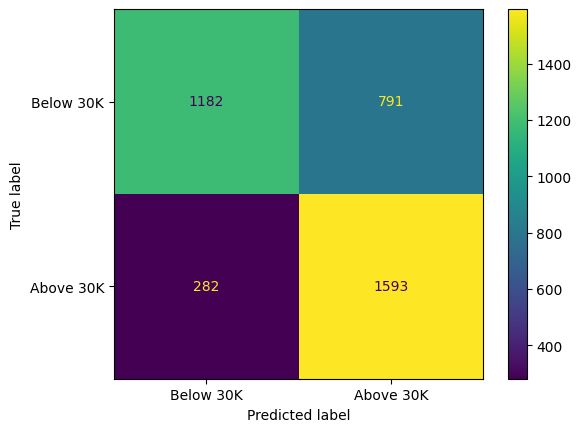

In [27]:
from sklearn import metrics
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_dt, display_labels = ['Below 30K', 'Above 30K'])
cm_display.plot()
plt.show()

Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(max_depth=9, max_features="log2", n_estimators=25)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=25)

In [30]:
y_pred_rf = rf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy score of Random forest is:", accuracy)

Accuracy score of Random forest is: 0.8032744282744283


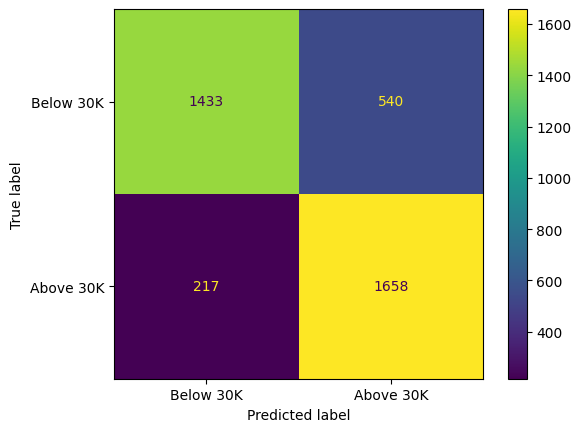

In [32]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix_rf, display_labels = ['Below 30K', 'Above 30K'])
cm_display.plot()
plt.show()